In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base_file = "../merged_data/merged_all_data.csv"
base_df = pd.read_csv(base_file)
trans_df = base_df.transpose()
trans_df.columns = trans_df.iloc[1]
trans_df = trans_df.drop(trans_df.index[1])
trans_df = trans_df.drop(trans_df.index[0])

trans_df = trans_df.drop(["Employment_2001","Establishments_2001","Employment_2002","Establishments_2002",
                         "Employment_2003","Establishments_2003","Employment_2004","Establishments_2004",
                         "Employment_2005","Establishments_2005","Employment_2006","Establishments_2006",
                         "Employment_2008","Establishments_2008","Employment_2009","Establishments_2009",
                         "Employment_2010","Establishments_2010","Employment_2011","Establishments_2011",
                         "Employment_2012","Establishments_2012","Employment_2013","Establishments_2013",
                         "Employment_2014","Establishments_2014"])
trans_df

Description,Furniture and Home Furnishings Stores,Electronics and Appliance Stores,Grocery Stores,Clothing and Clothing Accessories Stores
Employment_2000,"549,184","407,321","2,716,868","1,368,665"
Establishments_2000,"64,842","45,592","98,275","150,946"
Employment_2007,"596,538","500,780","2,564,533","1,648,157"
Establishments_2007,"65,485","52,470","92,315","155,371"
Employment_2015,"445,240","407,409","2,800,048","1,711,022"
Establishments_2015,"50,336","46,731","95,514","146,694"


In [4]:
trans_df=trans_df.rename(columns= {'Furniture and Home Furnishings Stores': 'furniture',
                                     'Electronics and Appliance Stores':'electronics',
                                     'Grocery Stores':'grocery','Clothing and Clothing Accessories Stores':'clothing'}) 

trans_df

Description,furniture,electronics,grocery,clothing
Employment_2000,"549,184","407,321","2,716,868","1,368,665"
Establishments_2000,"64,842","45,592","98,275","150,946"
Employment_2007,"596,538","500,780","2,564,533","1,648,157"
Establishments_2007,"65,485","52,470","92,315","155,371"
Employment_2015,"445,240","407,409","2,800,048","1,711,022"
Establishments_2015,"50,336","46,731","95,514","146,694"


In [5]:
trans_df.grocery = pd.to_numeric(trans_df.grocery.str.replace(',',''), errors = 'coerce')
trans_df.electronics = pd.to_numeric(trans_df.electronics.str.replace(',',''), errors = 'coerce')
trans_df.furniture = pd.to_numeric(trans_df.furniture.str.replace(',',''), errors = 'coerce')
trans_df.clothing = pd.to_numeric(trans_df.clothing.str.replace(',',''), errors = 'coerce')
trans_df

Description,furniture,electronics,grocery,clothing
Employment_2000,549184,407321,2716868,1368665
Establishments_2000,64842,45592,98275,150946
Employment_2007,596538,500780,2564533,1648157
Establishments_2007,65485,52470,92315,155371
Employment_2015,445240,407409,2800048,1711022
Establishments_2015,50336,46731,95514,146694


In [22]:
labels = ['2000','2000','2007','2007',
          '2015','2015','2015']
sizes = [trans_df.furniture[0]/1000,trans_df.furniture[1]/1000,trans_df.furniture[2]/1000,
         trans_df.furniture[3]/1000,trans_df.furniture[4]/1000,trans_df.furniture[5]/1000]

x = range(6)

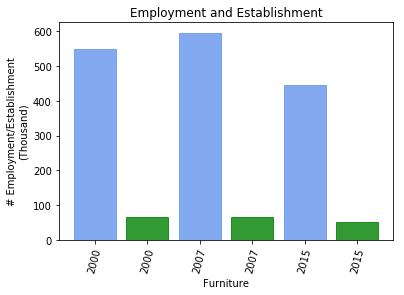

In [26]:
barlist= plt.bar(x, sizes, alpha = .8,edgecolor='k')
barlist[0].set_color('cornflowerblue')
barlist[2].set_color('cornflowerblue')
barlist[4].set_color('cornflowerblue')
barlist[1].set_color('green')
barlist[3].set_color('green')
barlist[5].set_color('green')
plt.xticks(x,labels, rotation = 75)
plt.xlabel("Furniture")
plt.ylabel("# Employment/Establishment\n(Thousand)")
plt.title("Employment and Establishment")
plt.savefig("../plots/complete_plots/furnitureBar.png",bbox_inches='tight')

In [27]:
labels = ['2000','2000','2007','2007',
          '2015','2015','2015']
sizes = [trans_df.electronics[0]/1000,trans_df.electronics[1]/1000,trans_df.electronics[2]/1000,
         trans_df.electronics[3]/1000,trans_df.electronics[4]/1000,trans_df.electronics[5]/1000]

x = range(6)

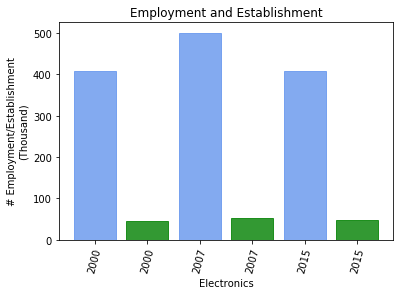

In [30]:
barlist1= plt.bar(x, sizes, alpha = .8,edgecolor='k')
barlist1[0].set_color('cornflowerblue')
barlist1[2].set_color('cornflowerblue')
barlist1[4].set_color('cornflowerblue')
barlist1[1].set_color('green')
barlist1[3].set_color('green')
barlist1[5].set_color('green')
plt.xticks(x,labels, rotation = 75)
plt.xlabel("Electronics")
plt.ylabel("# Employment/Establishment\n(Thousand)")
plt.title("Employment and Establishment")

plt.savefig("../plots/complete_plots/electronicsBar.png",bbox_inches='tight')

In [31]:
labels = ['2000','2000','2007','2007',
          '2015','2015','2015']
sizes = [trans_df.grocery[0]/1000,trans_df.grocery[1]/1000,trans_df.grocery[2]/1000,
         trans_df.grocery[3]/1000,trans_df.grocery[4]/1000,trans_df.grocery[5]/1000]

x = range(6)

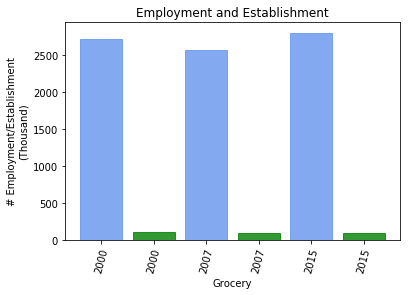

In [32]:
barlist2= plt.bar(x, sizes, alpha = .8,edgecolor='k')
barlist2[0].set_color('cornflowerblue')
barlist2[2].set_color('cornflowerblue')
barlist2[4].set_color('cornflowerblue')
barlist2[1].set_color('green')
barlist2[3].set_color('green')
barlist2[5].set_color('green')
plt.xticks(x,labels, rotation = 75)
plt.xlabel("Grocery")
plt.ylabel("# Employment/Establishment\n(Thousand)")
plt.title("Employment and Establishment")

plt.savefig("../plots/complete_plots/groceryBar.png",bbox_inches='tight')

In [33]:
labels = ['2000','2000','2007','2007',
          '2015','2015','2015']
sizes = [trans_df.clothing[0]/1000,trans_df.clothing[1]/1000,trans_df.clothing[2]/1000,
         trans_df.clothing[3]/1000,trans_df.clothing[4]/1000,trans_df.clothing[5]/1000]

x = range(6)

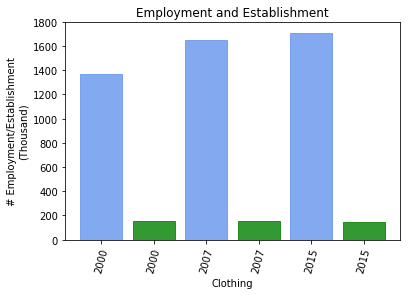

In [34]:
barlist3= plt.bar(x, sizes, alpha = .8,edgecolor='k')
barlist3[0].set_color('cornflowerblue')
barlist3[2].set_color('cornflowerblue')
barlist3[4].set_color('cornflowerblue')
barlist3[1].set_color('green')
barlist3[3].set_color('green')
barlist3[5].set_color('green')
plt.xticks(x,labels, rotation = 75)
plt.xlabel("Clothing")
plt.ylabel("# Employment/Establishment\n(Thousand)")
plt.title("Employment and Establishment")

plt.savefig("../plots/complete_plots/clothingBar.png",bbox_inches='tight')